### Heart disease prediction - Kaggle dataset
<br><br />
#### XGBoost Classification model
In this part of the project we train a XGBoost tree-based model and try to predict heart disease. This algorithm is very popular for such problems, and is based on Gradient Boost method, only here the boosting method is employed in an extreme fashion, hence the 'X' in the name.<br><br />

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

import xgboost as xgb

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# -- import cleaned data --
df = pd.read_csv('heart_dumm_clean.csv')
df.describe()

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,746.00000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,372.50000,52.882038,133.022788,244.635389,0.167560,140.226542,0.384718,0.901609,0.477212,0.243968,...,0.495979,0.222520,0.226542,0.054960,0.235925,0.596515,0.167560,0.057641,0.474531,0.467828
std,215.49594,9.505888,17.282750,59.153524,0.373726,24.524107,0.486855,1.072861,0.499816,0.429762,...,0.500319,0.416218,0.418874,0.228055,0.424860,0.490926,0.373726,0.233219,0.499686,0.499299
min,0.00000,28.000000,92.000000,85.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.25000,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,372.50000,54.000000,130.000000,237.000000,0.000000,140.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,558.75000,59.000000,140.000000,275.000000,0.000000,160.000000,1.000000,1.500000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,745.00000,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# -- creating input and target data for model training/testing --
dfin = df.copy().drop(['Unnamed: 0', 'HeartDisease'], axis='columns')
dfout = df.copy()['HeartDisease']

In [164]:
print('-- XGBOOST --')
RS = 50
X_train, X_test, y_train, y_test = train_test_split(dfin, dfout, test_size=0.3, stratify=dfin['Sex_F'], 
                                          random_state=RS)

bstmod = xgb.XGBClassifier(objective="binary:logistic", max_depth=7, eta=0.08, 
                       use_label_encoder=False, subsample=0.7, verbosity=1, 
                       eval_metric="logloss")
bstmod.fit(X_train, y_train)

print('Model Train Accuracy: ', round(bstmod.score(X_train, y_train),4))
print('Model Test Accuracy: ', round(bstmod.score(X_test, y_test),4))

y_predict_test = bstmod.predict(X_test)
print(' Confusion matrix: \n', metrics.confusion_matrix(y_test, y_predict_test))

crsv = cross_val_score(bstmod, dfin, dfout, cv = 7)
print('Cross validation mean scores: ', round(crsv.mean(),4))
print('Cross validation std dev: ', round(crsv.std(),4))

-- XGBOOST --
Model Train Accuracy:  0.9923
Model Test Accuracy:  0.8795
 Confusion matrix: 
 [[100  16]
 [ 11  97]]
Cross validation mean scores:  0.8791
Cross validation std dev:  0.0678


<br>
The trained model in this case is already optimized to a reasonable extent, so we will move straight to model comparison and then analysis of the model.
<br><br />

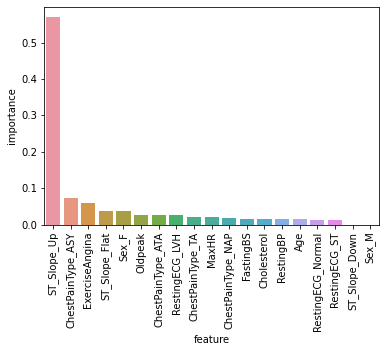

In [27]:
# -- feature importance --
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance' : bstmod.feature_importances_})
imp_df.sort_values('importance', ascending=False, inplace = True)

sns.barplot(x='feature', y='importance', data=imp_df)
plt.xticks(rotation=90)
plt.show()


It can be observed that again the top important features are similar to previous models, but the order and intensity varies. This is what brings out the difference in all the algorithms for the different models. They all minimize error, but using features in very different ways. The final comparison of all the models used is:<br><br />

| Model | Train score | Test score | CV score | CV std |
| --- | --- | --- | --- | --- |
| **Decision Tree** | 96 % | 82.6 % | 82.5 % | 7.9 % |
| **Random Forest (tuned)** | 94.4 % | 85.7 % | 86.8 % | 6.5 % |
| **Gradient Boost (tuned)** | 100 % | 85.7 % | 87.4 % | 6.1 % |
| **XGBoost (optimized)** | 99.2 % | 88 % | 88 % | 6.8 %|

<br><br />
*XGBoost* is clearly the best, but not by a lot. We can always analyze the models, and then reiterate by further data cleaning and modification for better predicting models. But we now move on to analysis of the model and the data.<br><br />
___

# -- Data and Model insights --
### (the fun part)
<br><br />
After all the modelling and comparing accuracy in prediction, we now take a look at what is it that the model (and hence the data) says. For this we use the model explainer library **SHAP** (Shapely Additive exPlanations), which explains models like our tree based model by using SHAP values that indicate how impactful the feature was in predicting the output of the model. 

> ##### _SHAP values can be high in magnitude (meaning higher impact on model) and positive or negative (meaning impact towards positive or negative output, i.e. towards 1 or 0 output in this case)._

<br>
We apply the SHAP analysis to the _XGBoost_ model because it is most suitable for SHAP analysis and one of the better models in performance.
<br><br />


In [38]:
import shap

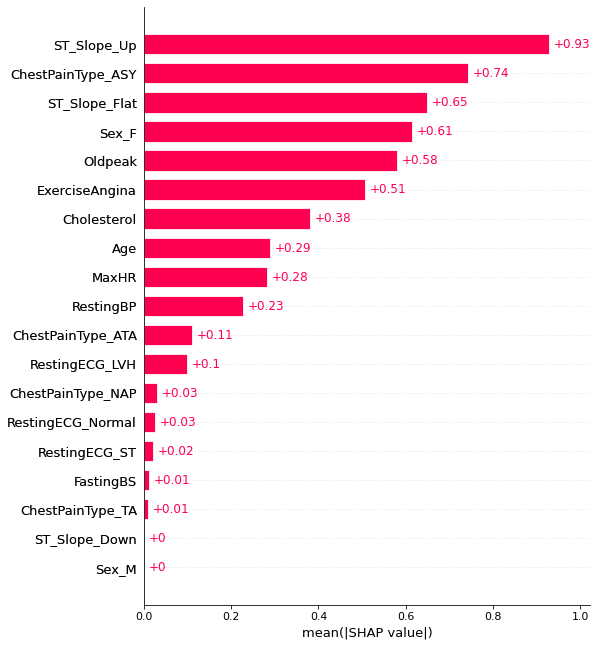

In [189]:
explainer = shap.Explainer(bstmod)    # creating SHAP explainer model
shap_values = explainer(X_test)       # computing SHAP values for features using test data

shap.plots.bar(shap_values, max_display=20)

<br><br />
The above plot is similar to feature importance plot that we have used for previous models as well - it ranks the overall impact of the feature. The first thing to note is that although the top important features are similar in all models, the order of importance varies with model as well as the analysis type (compare the *feature importance* plot for the same *XGBoost* model above).<br><br />


We can also explore each row of data and figure out how those particular features and values contributed to the model outcome. For this we use the *waterfall* plot in SHAP. The plot shows the contribution in *log-odds* for the top features and how they affect the outcome over the average model outcome for the entire training dataset. Here we see the results for the 150th row of the data.
<br><br />



SHAP values for row number 150 of data --> HeartDisease target value:  0


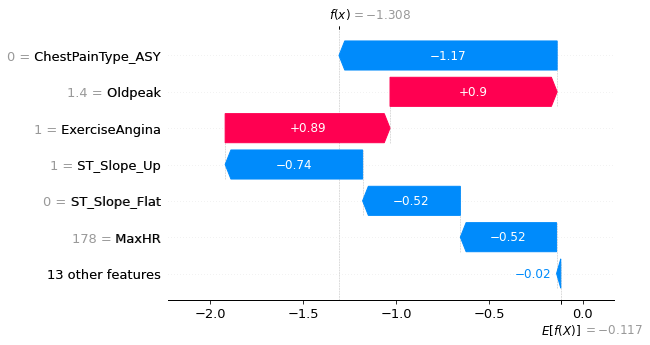

In [251]:
r = 150
print('SHAP values for row number',r,'of data --> HeartDisease target value: ', y_test.to_list()[r])
shap.plots.waterfall(shap_values[r], max_display=7)

<br><br />
Note how all features push and pull the value to its final predicted value, and the order for this row can differ from the overall importance order. If the value lies to the left of the *E\[f(x)\]* (or the expected model outcome) the outcome is *0* and vice-versa. This tells you something about the inner workings of the models, and how not to base serious intuitive causal relationship on their predictions - the models compute a certain way to generate outcome, which isn't always meaningful. Let's see an example of this below. 
<br><br />

#### Feature importance analysis  --> *Sex_F and Sex_M*
It seems from previous models and model analyses that few features like *Oldpeak*, *ST_Slope_Up/Flat*, *ExerciseAngina*, etc are common important features - this is to be expected if there is any correlation between feature attribute and the target output. However, we observe that ***Sex_F*** is high in importance, whereas ***Sex_M*** is not important at all for the *XGBoost* model. We have seen moderate importance for both in previous models (which kind of makes intuitive sense), so what is happening here? Let us investigate:<br><br />

Our first hint is that this part of the data is imbalanced.
<br>



In [254]:
sex_f_count = df["Sex_F"].value_counts()
print('Sex_F counts: \n',sex_f_count)

Sex_F counts: 
 0    564
1    182
Name: Sex_F, dtype: int64



182 data for female (as compared to 564 for male). Let us also check the distribution of target outcomes (i.e. *HeartDisease* *1* or *0*) within the *Sex_F* counts
<br><br />

In [256]:
sex_f_hd_true = df.groupby(['Sex_F']).sum()['HeartDisease']
print('HeartDisease % TRUE: \n', round(sex_f_hd_true/sex_f_count*100,2))

HeartDisease % TRUE: 
 Sex_F
0    56.03
1    21.98
dtype: float64



This sheds some light on the matter. The dataset is imbalanced in terms of gender, but we attempted to avoid issues by splitting training and test data with equal fractions of both genders. But within that data fraction, female gender data has only 22 % *HeartDisease* cases (rest are normal) whereas the male gender has roughly equal split of either target outcome (56 %). This shows that having *Sex_F* = 1 (female data) would make it less likely that the outcome is *HeartDisease* = 1.

We can check this another way, using the violin summary plot of SHAP values of the top 10 features.
<br>

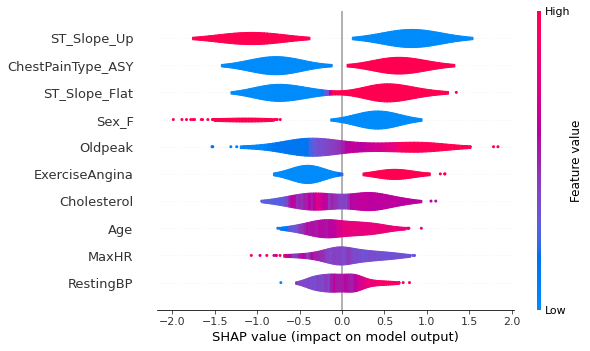

In [257]:
shap.summary_plot(shap_values, X_test, plot_type="violin", max_display=10)

It can be observed that positive and negative impact of *Sex_F* is highly skewed, unlike features like *ST_Slope_Up* that shows a balanced trend. This again shows that our model has made use of this information to '*boost*' accuracy, where being female has strong negative impact on the outcome. But the reality is that data for this gender is very less and imbalanced, and hence we must be careful in such cases. On the other hand, being male does not have much impact, and that is captured correctly in this model.
<br>
> ##### Conclusion:
**Model should not be blindly trusted for *female* input data predictions.**

<br><br />
#### Dependence analysis
Next, we take a look at other insights that SHAP value can help provide. One of the features that allows this is the *dependence* plot between two features.
<br>



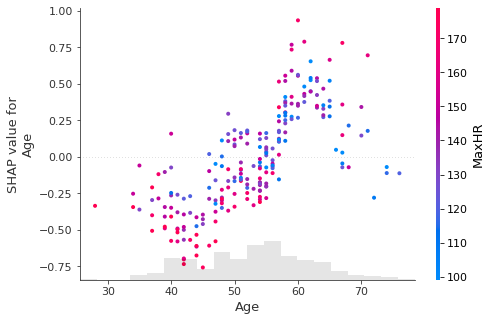

In [258]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"MaxHR"])


We use *Age* as an example here because it is easy to intuitively form insights for physically relevant attributes (for other top scoring attributes, medical domain expert can do the same). In the above plot, the following are the observations:
- As *Age* goes from low to high, *HeartDisease* impact goes from negative (less likely) to positive (more likely) - this is very intuitive.
- *MaxHR* (max heart rate) high values impact the outcome significantly - i.e. high *MaxHR* values in lower ages makes *HeartDisease* unlikely, and in high ages it makes *HeartDisease* very likely.

This is very interesting, as this could relate to the fact that lower age people with high max heart rates are more physically active, hence the high max heart rate. And we can also understand high heart rate at higher ages can be a sign of problems. Although this is conjecture at this point, a medical professional can really draw useful insights from this.<br><br />

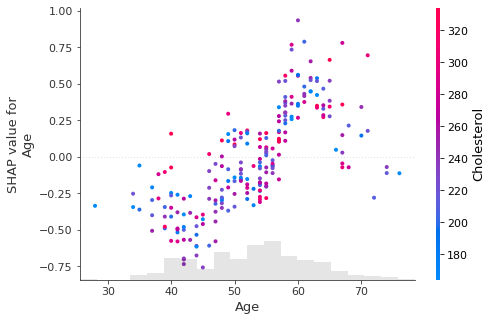

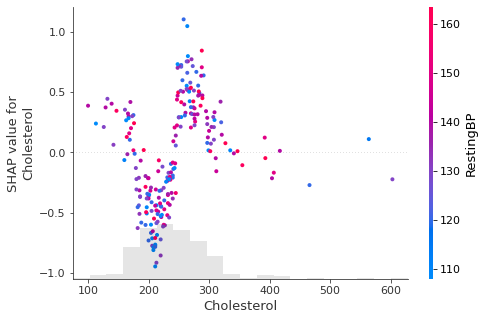

In [290]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Cholesterol"])
shap.plots.scatter(shap_values[:,"Cholesterol"], color=shap_values[:,"RestingBP"])

The first plot shows that within the trend for *Age* impacting model outcome, *Cholesterol* levels are uniformly spread across all ages (i.e. no observable trend).

The second plot shows that *Cholesterol* itself has a clear and strong trend of model impact, and that *RestingBP* (resting blood pressure) may have a weakly correlated trend. This plot also shows that *Cholesterol* has some extreme outlying values that barely affect the model, which can be considered for dropping from data to improve the model in a future iteraion.

> *Please note that the above analysis is based on test data portion of the dataset, which is a very limited number. So that must also be kept in mind while making claims and deriving insights.*

<br><br />

## Conclusions
Through **SHAP** value analysis, we gained the following insights:
- *Oldpeak*, *ST_Slope_Up*, *ST_Slope_Flat*, *ExerciseAngina*, *ChestPainType_ASY* are good indicator of *HeartDisease*. A very simple model may be built only using these features.
- *Female* input data should be used carefully for prediction using model based on current dataset.
- *Age* has an intuitive trend for predicting *HeartDisease* and has an interesting trends in relation to *MaxHR*.
- *Cholesterol* has a clear and strong trend for predicting *HeartDisease*.